# Linear Regression Models

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

#Load Data
diabetes = load_diabetes()

#Convert the data to a pandas DF
my_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target - 25 to 346
my_df['Target'] = diabetes.target

my_df.head()
 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
#Split the data into X and Y
X = my_df.drop('Target',axis=1)
y = my_df['Target']
X.shape, y.shape

((442, 10), (442,))

In [12]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8,random_state=42)

# Print out the shape of the training and testing sets
print("Training set shape: ",X_train.shape,y_train.shape)
print("Testing set shape: ",X_test.shape,y_test.shape)

Training set shape:  (353, 10) (353,)
Testing set shape:  (89, 10) (89,)


In [14]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression Model
lr = LinearRegression()

In [15]:
# Train the model on the training set
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict on the testing set
# y_prediction are precdicted values of the target based on the features
# Once we have the those prections, we can compare them to the actual values ofthe target variable..
# To evalute the performace of the model..
y_prediction = lr.predict(X_test)
y_prediction.shape

(89,)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the perfomace of the model

# R2: variance of the depedent variable (target) explained by the independent variables (features)
# How well the model fits the data. Higher the better(0-1)
r2 = r2_score(y_test,y_prediction)

# MSE: Average Squared Distace between the pridicted and the actual values, Lower the better...
mse = mean_squared_error(y_test,y_prediction)

# MAE: Average Aboslute Distance between the pridicted and actial values. Lower the better....
mae = mean_absolute_error(y_test,y_prediction)

# Intercept : Starting point of the regression line on the y-axis. 
# Value of dependent variable (target) when the independent variables (features) are 0.
# If positive number, target increases as feature increases and vice versa..
intecept = lr.intercept_

print("R2: ",r2)
print("mse: ",mse)
print("mae: ",mae)
print("intecept: ",intecept)

R2:  0.4526027629719195
mse:  2900.1936284934814
mae:  42.79409467959994
intecept:  151.34560453985995


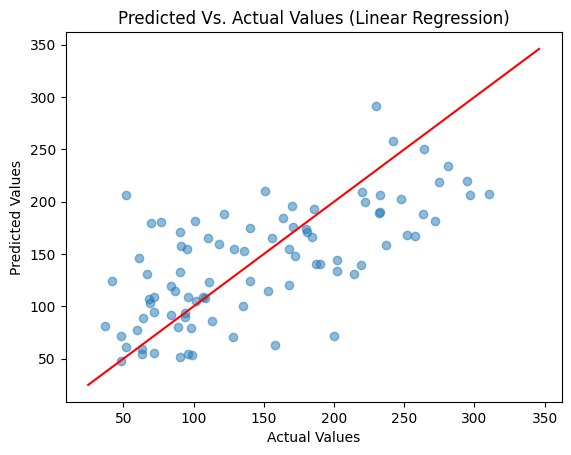

In [21]:
import matplotlib.pyplot as plt

# Plot the Predicted and Actual vales
# Predicted values of the target are ploted on the x-axis
# Actual values of the target variable are plotted on the y-axis
# If the model is a good fit, the point should be close to the diagonal line,
# indicating a string Linear Regression between the actual and predicted values...

plt.scatter(y_test, y_prediction , alpha= 0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted Vs. Actual Values (Linear Regression)")
plt.show()

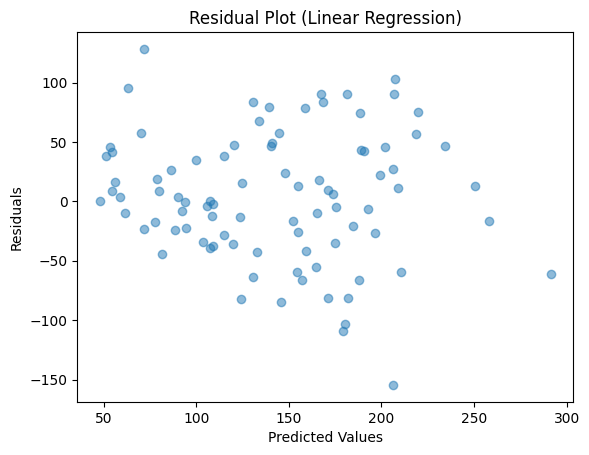

In [23]:
# Plot the residuals
# The residuals are plotted against the predicted values of the target variables..
# If the Linear Regression models is a good fit for the data,
# the residual plot should show a rnadom scatter of the points around zero
# With a discernable trend.
plt.scatter(y_prediction, y_test -y_prediction, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()